# Batch results

Here we load every `.npz` created above and compute some statistics.

In [1]:
from pathlib import Path
from notebooks.utils import get_index, init_stats, store_stats

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_results = Path(r"../../results")
l_labels = ('0', '0.5', '1', '2', '3', '4', '5')
g_labels = ('0', '0.5', '1', '2', '3')
stats = init_stats(len(l_labels), len(g_labels))
for r in path_results.rglob("results*"):
    info = r.stem.split("_")
    if len(info) > 3:
        # special case, skip
        continue
    _, l, g = info
    l, g = get_index(l), get_index(g)
    results = np.load(r, allow_pickle=True)['arr_0'].tolist()

    stats = store_stats(stats, results, l, g)
del r, l, g, results

U:\2.magistrale\laurea\tesi\MRI-US_fusion\notebooks\utils.py:685: RuntimeWarning: Mean of empty slice.
  stats["target"]["final"]["good"]["dice"]["mean"][l, g] = good_dice_vals.mean()
u:\2.magistrale\laurea\tesi\mri-us_fusion\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
u:\2.magistrale\laurea\tesi\mri-us_fusion\venv\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
u:\2.magistrale\laurea\tesi\mri-us_fusion\venv\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
u:\2.magistrale\laurea\tesi\mri-us_fusion\venv\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
U:\2.magist

Some plots

In [ ]:
def plot_target_mean_stats(target_set):
    _, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='all')

    sns.heatmap(target_set["ratio"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0])
    ax[0].set_title("% of decent Dice (Dice > 0)"), ax[0].set_xlabel("Gamma"), ax[0].set_ylabel("Lambda")

    sns.heatmap(target_set["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1])
    ax[1].set_title("Target Dice coefficients"), ax[1].set_xlabel("Gamma"), ax[1].set_ylabel("Lambda")
    #for t in hm.texts: t.set_text(f"{t.get_text()}±{valid_dice_std[[int(p) for p in t.get_position()]]}")

    sns.heatmap(target_set["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[2])
    ax[2].set_title("Target Registration Error (TRE) [mm]"), ax[2].set_xlabel("Gamma"), ax[2].set_ylabel("Lambda")

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

plot_target_mean_stats(stats["target"]["final"]["valid"])

In [ ]:
def plots_1():
    _, ax = plt.subplots(2, 3, figsize=(20, 10), sharey='all')

    axx = ax[0, 0]
    sns.heatmap(stats["target"]["pre"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("Target Dice PRE [MEAN]"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    axx = ax[1, 0]
    sns.heatmap(stats["target"]["pre"]["dice"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("Target Dice PRE [STD]"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    axx = ax[0, 1]
    sns.heatmap(stats["target"]["final"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("Target Dice PRE"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    axx = ax[1, 1]
    sns.heatmap(stats["target"]["final"]["valid"]["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("TRE PRE"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    axx = ax[0, 2]
    sns.heatmap(stats["prostate"]["final"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("Target Dice PRE STD"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    axx = ax[1, 2]
    sns.heatmap(stats["target"]["final"]["valid"]["error"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
    axx.set_title("TRE PRE STD"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

    plt.subplots_adjust(wspace=0.25, hspace=0.30)
    plt.show()

In [ ]:
def plots_2():
    _, ax = plt.subplots(2, 3, figsize=(20, 12), sharey='all')

    sns.heatmap(stats["prostate"]["final"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 0])
    ax[0, 0].set_title("Prostate Dice coefficients MEAN"), ax[0, 0].set_xlabel("Gamma"), ax[0, 0].set_ylabel("Lambda")

    sns.heatmap(stats["prostate"]["final"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 0])
    ax[1, 0].set_title("Prostate Dice coefficients STD"), ax[1, 0].set_xlabel("Gamma"), ax[1, 0].set_ylabel("Lambda")

    sns.heatmap(stats["target"]["final"]["valid"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 1])
    ax[0, 1].set_title("Target Dice coefficients MEAN"), ax[0, 1].set_xlabel("Gamma"), ax[0, 1].set_ylabel("Lambda")

    sns.heatmap(stats["target"]["final"]["valid"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 1])
    ax[1, 1].set_title("Target Dice coefficients STD"), ax[1, 1].set_xlabel("Gamma"), ax[1, 1].set_ylabel("Lambda")

    sns.heatmap(stats["target"]["final"]["valid"]["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 2])
    ax[0, 2].set_title("Target Registration Error (TRE) MEAN [mm]"), ax[0, 2].set_xlabel("Gamma"), ax[0, 2].set_ylabel("Lambda")

    sns.heatmap(stats["target"]["final"]["valid"]["error"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 2])
    ax[1, 2].set_title("Target Registration Error (TRE) STD [mm]"), ax[1, 2].set_xlabel("Gamma"), ax[1, 2].set_ylabel("Lambda")

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

Save figures one by one

KeyError: 'valid'

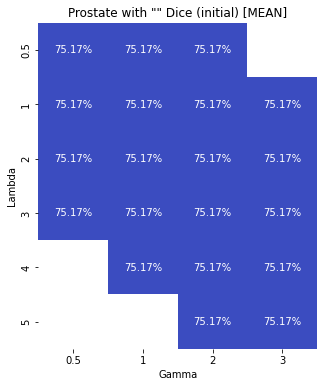

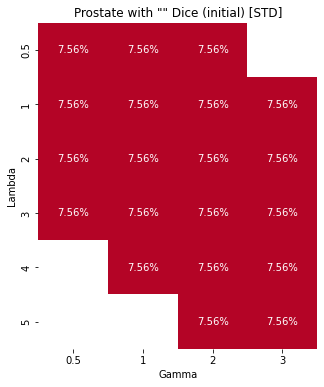

In [6]:
def save_plot(subject, stage, how, what, value, show=False, exclude_zero=True):
    stats_to_plot = stats[subject][stage]
    stats_to_plot, focus = (stats_to_plot[how], f"{stage}_{how}") if stage != "pre" or subject == "target" else (stats_to_plot, f"{stage}")
    stats_to_plot = stats_to_plot[what] if what == "ratio" else stats_to_plot[what][value]
    stats_to_plot = stats_to_plot[1:, 1:] if exclude_zero else stats_to_plot
    fmt = ".2f" if what == "error" else ".2%"
    topic = f"{what}" if what == "ratio" else f"{what}_{value}"
    if stage == "def":
        situation = " (relative)"
    elif stage == "pre":
        situation = " (initial)"
    else:
        situation = ""
    if subject == "target":
        if how == "good":
            description = ", when Dice > 25%"
        elif how == "valid":
            description = ", when Dice is valid"
        else:
            description = f", when Dice is {how}"
    else:
        description = ""
    cmap = "coolwarm_r" if what == "error" or (value == "std" and what != "ratio") else "coolwarm"

    _, ax = plt.subplots(figsize=(5, 6))
    sns.heatmap(
        stats_to_plot,
        annot=True, fmt=fmt,
        xticklabels=g_labels[(1 if exclude_zero else 0):], yticklabels=l_labels[(1 if exclude_zero else 0):],
        cmap=cmap, cbar=False,
        ax=ax)
    if what == "dice":
        ax.set_title(f"{subject.capitalize()} with \"{how}\" Dice{situation} [{value.upper()}]")
    elif what == "ratio":
        ax.set_title(f"Distribution of \"{how}\" targets [{what.upper()}]")
    else:
        ax.set_title(f"TRE of \"{how}\" targets{situation} (in mm) [{value.upper()}]")
    ax.set_xlabel("Gamma")
    ax.set_ylabel("Lambda")
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/{subject}_{focus}_{topic}{'' if exclude_zero else '_zero'}.pdf", bbox_inches="tight")

# prostate plots
save_plot(subject="prostate", stage="pre", how="", what="dice", value="mean", show=False)
save_plot(subject="prostate", stage="pre", how="", what="dice", value="std", show=False)

save_plot(subject="prostate", stage="def", how="valid", what="dice", value="mean", show=False)
save_plot(subject="prostate", stage="def", how="valid", what="dice", value="std", show=False)
save_plot(subject="prostate", stage="def", how="good", what="dice", value="mean", show=False)
save_plot(subject="prostate", stage="def", how="good", what="dice", value="std", show=False)

save_plot(subject="prostate", stage="final", how="valid", what="dice", value="mean", show=False, exclude_zero=False)
save_plot(subject="prostate", stage="final", how="valid", what="dice", value="std", show=False, exclude_zero=False)
save_plot(subject="prostate", stage="final", how="valid", what="dice", value="mean", show=False)
save_plot(subject="prostate", stage="final", how="valid", what="dice", value="std", show=False)

# target plots
save_plot(subject="target", stage="pre", how="", what="dice", value="mean", show=False)
save_plot(subject="target", stage="pre", how="", what="dice", value="std", show=False)
save_plot(subject="target", stage="pre", how="", what="error", value="mean", show=False)
save_plot(subject="target", stage="pre", how="", what="error", value="std", show=False)

save_plot(subject="target", stage="def", how="valid", what="dice", value="mean", show=False)
save_plot(subject="target", stage="def", how="valid", what="dice", value="std", show=False)
save_plot(subject="target", stage="def", how="valid", what="error", value="mean", show=False)
save_plot(subject="target", stage="def", how="valid", what="error", value="std", show=False)

save_plot(subject="target", stage="def", how="good", what="dice", value="mean", show=False)
save_plot(subject="target", stage="def", how="good", what="dice", value="std", show=False)
save_plot(subject="target", stage="def", how="good", what="error", value="mean", show=False)
save_plot(subject="target", stage="def", how="good", what="error", value="std", show=False)

save_plot(subject="target", stage="final", how="valid", what="ratio", value="", show=False)
save_plot(subject="target", stage="final", how="valid", what="dice", value="mean", show=False)
save_plot(subject="target", stage="final", how="valid", what="dice", value="std", show=False)
save_plot(subject="target", stage="final", how="valid", what="error", value="mean", show=False)
save_plot(subject="target", stage="final", how="valid", what="error", value="std", show=False)

save_plot(subject="target", stage="final", how="good", what="ratio", value="", show=False)
save_plot(subject="target", stage="final", how="good", what="dice", value="mean", show=False)
save_plot(subject="target", stage="final", how="good", what="dice", value="std", show=False)
save_plot(subject="target", stage="final", how="good", what="error", value="mean", show=False)
save_plot(subject="target", stage="final", how="good", what="error", value="std", show=False)